# Results Summary

In [3]:
import numpy as np
import mrcfile
from matplotlib import pyplot as plt
%matplotlib inline
import collections
import tensorflow as tf
from tensorflow import spectral
from ClassFiles.relion_fixed_it import load_star
from ClassFiles.AdversarialRegularizer import AdversarialRegulariser
from ClassFiles.ut import l2
from ClassFiles.Utilities import registration
from ClassFiles.ut import locate_gt, rfft, irfft, unify_form, Rescaler, find

external_path= '/local/scratch/public/sl767/MRC_Data/Data_002_10k/TestAR/'
classical_path= '/local/scratch/public/sl767/MRC_Data/Data_002_10k/EM/'
debugging_path = '/local/scratch/public/sl767/MRC_Data/Data_002_10k/ValidateExternal'
pdb_id = '5A0M' #  9ICA

def find_iteration(k, source=0):
    it = ''
    if k<10:
        it = '0'+str(k)
    else:
        it = str(k)   
    if source==0:
        path = external_path+pdb_id
        l = find('*it0{}_half2_class001_external_reconstruct.mrc'.format(it),path)
    elif source==1:
        path = classical_path+pdb_id
        l = find('*it0{}_half2_class001.mrc'.format(it),path)

    assert len(l)==1
    with mrcfile.open(l[0]) as mrc:
        res = mrc.data.copy()
    return res

def vis(data):
    plt.imshow(np.maximum(0,data.squeeze()[...,45]))
    
with mrcfile.open(locate_gt(pdb_id, full_path=False)) as mrc:
    gt = mrc.data.copy()

# The EM iterates

From left to right:

- Regularized with Adversarial Regularizers
- Tychonov regularization as currently implemented in RELION
- ground truth

Results shown are a 2D slice through the middle of the molecule

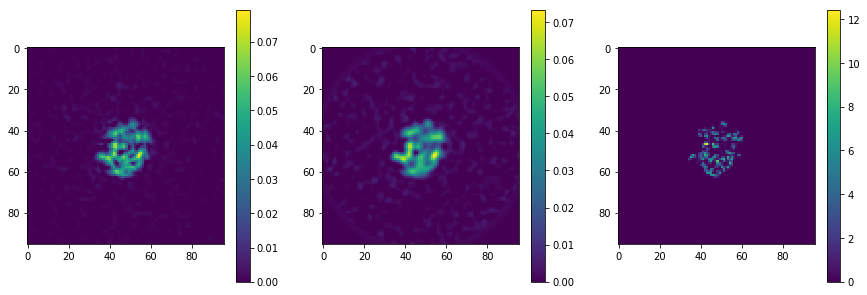

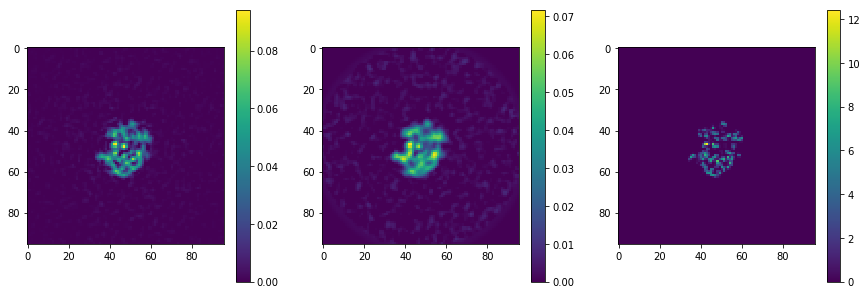

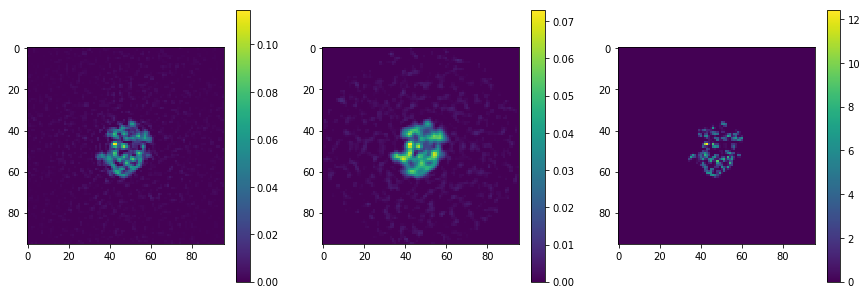

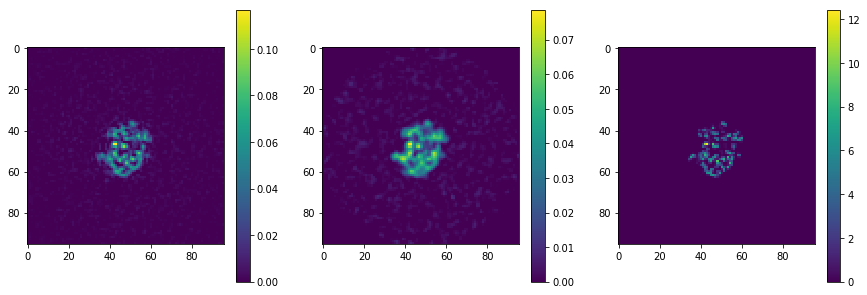

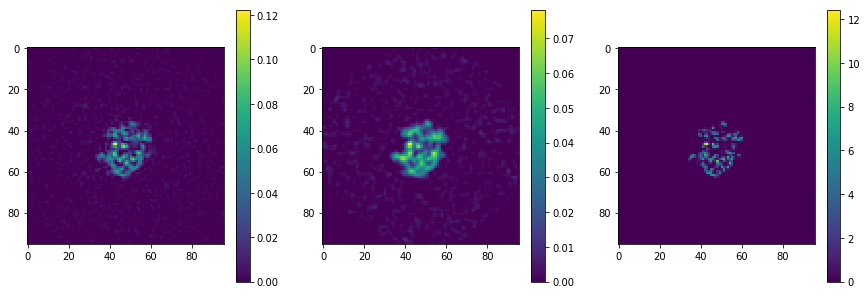

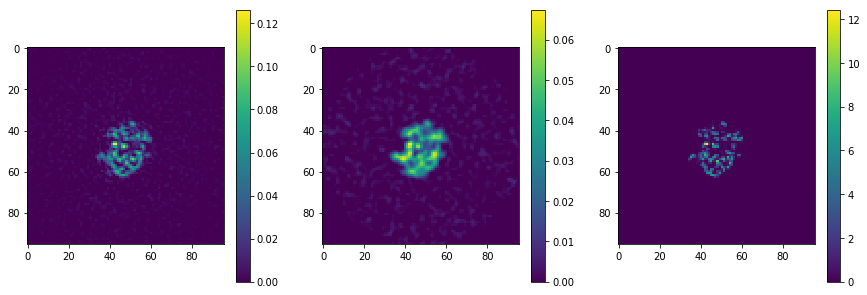

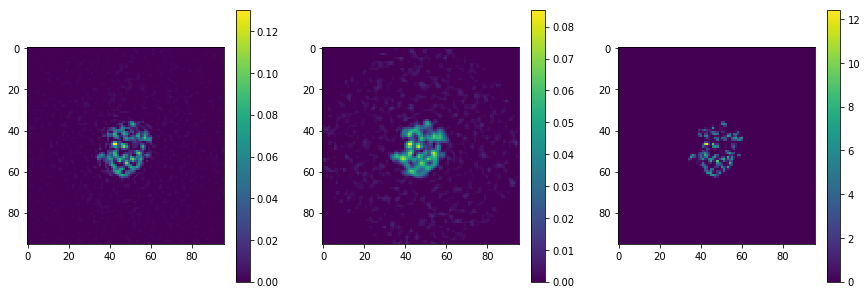

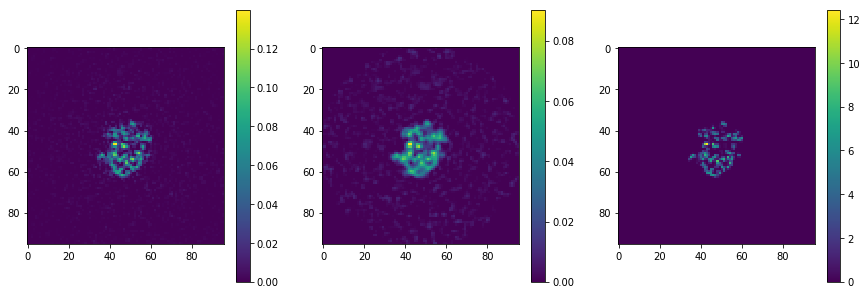

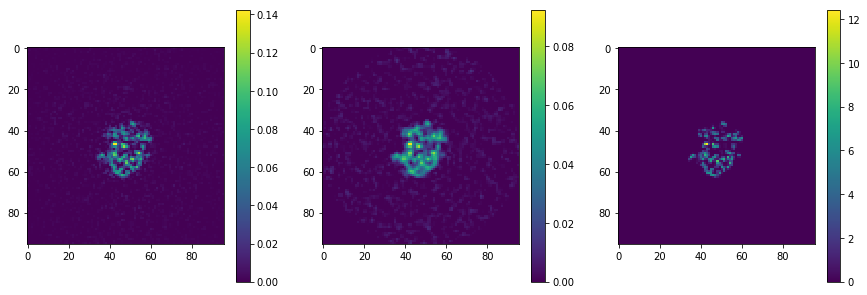

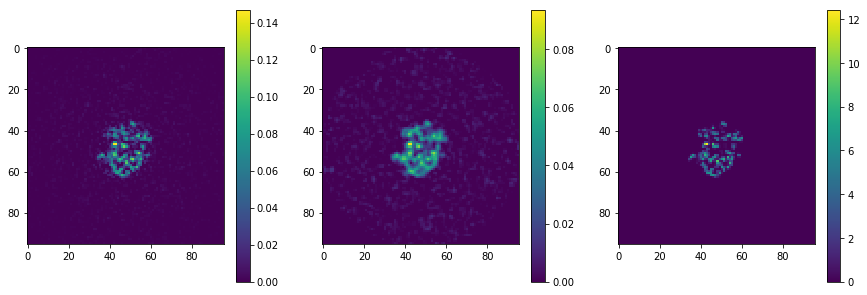

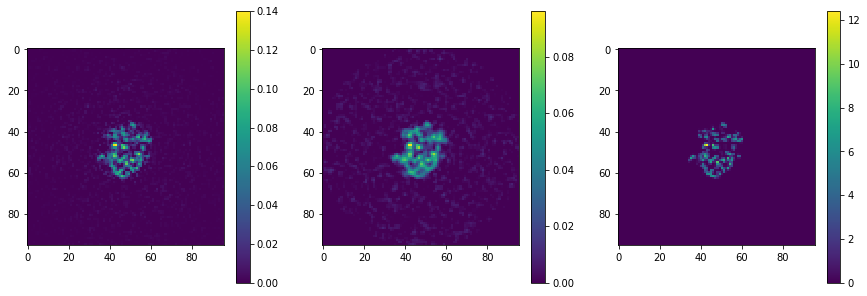

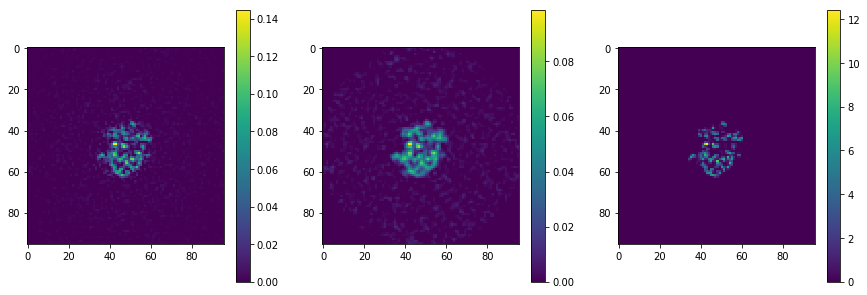

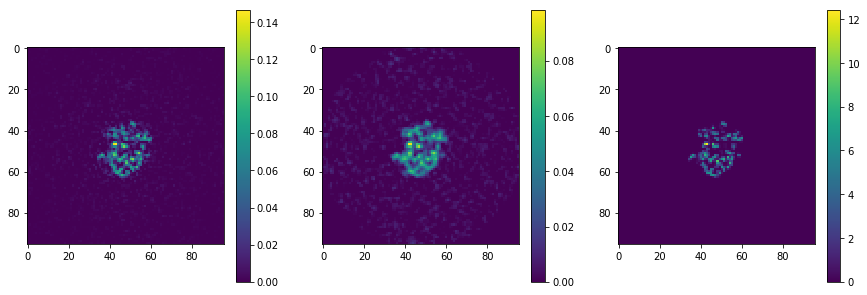

In [4]:
for k in range(13):
    plt.figure(k, figsize=(15,5))
    plt.subplot(131)
    im1 = find_iteration(k+1, source=0)
    vis(im1)
    plt.colorbar()
    plt.subplot(132)
    im2=find_iteration(k+1, source=1)
    vis(im2)
    plt.colorbar()
    plt.subplot(133)
    vis(gt)
    plt.colorbar()

# Results after the final merging step

Left to right as above.
We still observe a noticable gain in performance, but it is slightly less stunning than before the final merge

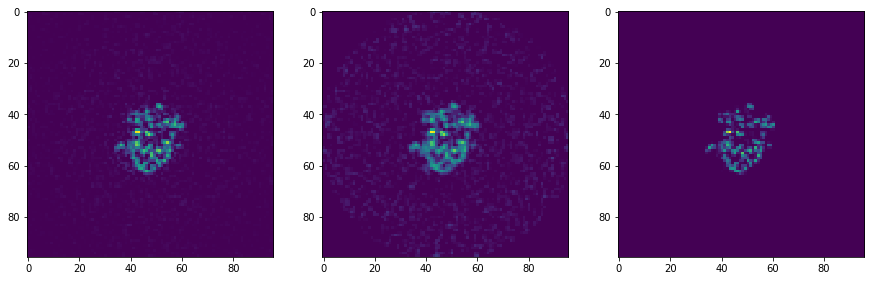

In [6]:
path_f_ar = external_path+pdb_id+'/5A0M_mult002_class001.mrc'
path_f_rel = classical_path+pdb_id+'/5A0M_mult002_class001.mrc'
with mrcfile.open(path_f_ar) as mrc:
    FINAL_AR = mrc.data.copy()
with mrcfile.open(path_f_rel) as mrc:
    FINAL_REL = mrc.data.copy()
plt.figure(figsize=(15,5))
plt.subplot(131)
vis(FINAL_AR)
plt.subplot(132)
vis(FINAL_REL)
plt.subplot(133)
vis(gt)